In [1]:
import xarray as xr

In [3]:
data = xr.load_dataset('NSIDC-0780_SeaIceRegions_EASE2-N25km_v1.0.nc')

In [4]:
data

<xarray.Dataset>
Dimensions:                      (y: 720, x: 720)
Coordinates:
  * x                            (x) float32 -8.988e+06 -8.962e+06 ... 8.988e+06
  * y                            (y) float32 8.988e+06 8.962e+06 ... -8.988e+06
Data variables:
    sea_ice_region               (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    sea_ice_region_surface_mask  (y, x) float32 40.0 40.0 40.0 ... 40.0 40.0
    crs                          <U1 ''
Attributes: (12/27)
    title:                    Geographic regions for sea ice for the 25km EAS...
    summary:                  This file provides a description of regions use...
    acknowledgment:           These data are produced and supported by the NA...
    id:                       10.5067/CYW3O8ZUNIWC
    naming_authority:         org.doi.dx
    standard_name_authority:  CF Standard Name Table (v77, 19 January 2021)
    ...                       ...
    geospatial_lat_min:       0.0
    geospatial_lat_max:       90.0
    geospatial_lat_units:     degrees_north
    geospatial_lon_min:       -180.0
    geospatial_lon_max:       180.0
    geospatial_lon_units:     degrees_east

In [5]:
data['sea_ice_region_surface_mask']

<xarray.DataArray 'sea_ice_region_surface_mask' (y: 720, x: 720)>
array([[40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       ...,
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.],
       [40., 40., 40., ..., 40., 40., 40.]], dtype=float32)
Coordinates:
  * x        (x) float32 -8.988e+06 -8.962e+06 ... 8.962e+06 8.988e+06
  * y        (y) float32 8.988e+06 8.962e+06 8.938e+06 ... -8.962e+06 -8.988e+06
Attributes:
    standard_name:          region
    long_name:              sea ice region mask with surface mask
    grid_mapping:           crs
    valid_range:            [ 0 40]
    flag_values:            [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ...
    flag_meanings:          ocean_no_region_specified central_arctic beaufort...
    coverage_content_type:  image

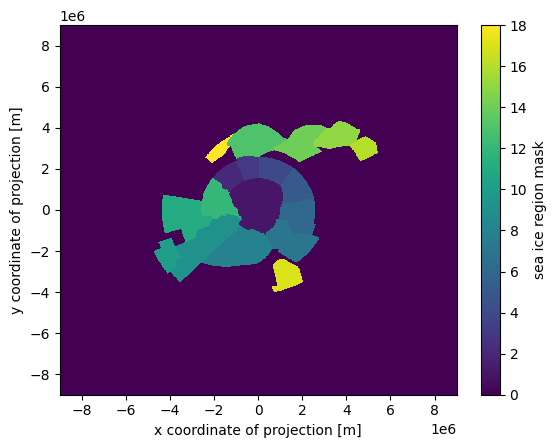

In [6]:
data['sea_ice_region'].plot()

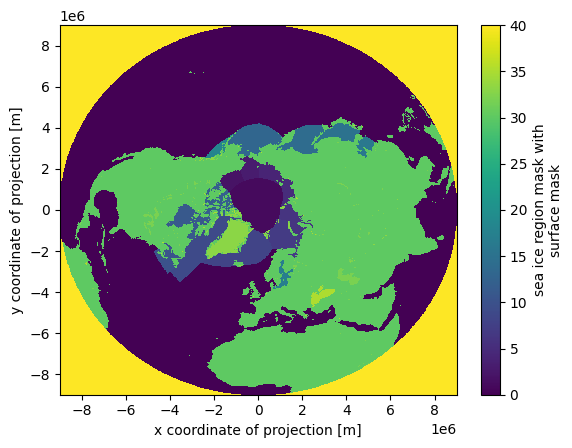

In [7]:
data['sea_ice_region_surface_mask'].plot()

In [8]:
tuple(zip(data['sea_ice_region_surface_mask'].flag_values, data['sea_ice_region_surface_mask'].flag_meanings.split(' ')))

((0, 'ocean_no_region_specified'),
 (1, 'central_arctic'),
 (2, 'beaufort_sea'),
 (3, 'chukchi_sea'),
 (4, 'east_siberian_sea'),
 (5, 'laptev_sea'),
 (6, 'kara_sea'),
 (7, 'barents_sea'),
 (8, 'east_greenland_sea'),
 (9, 'baffin_bay_and_labrador_seas'),
 (10, 'gulf_of_st_lawrence'),
 (11, 'hudson_bay'),
 (12, 'canadian_archipelago'),
 (13, 'bering_sea'),
 (14, 'sea_of_okhotsk'),
 (15, 'sea_of_japan'),
 (16, 'bohai_and_yellow_seas'),
 (17, 'baltic_sea'),
 (18, 'gulf_of_alaska'),
 (30, 'land'),
 (32, 'fresh_free_water'),
 (33, 'ice_on_land'),
 (34, 'floating_ice_shelf'),
 (35, 'ocean_disconnected'),
 (40, 'off_earth'))

Arctic:


In [9]:
seas = (
  (1, 2, 3, 4, 5),
  (6, 7),
  (8,),
  (9,),
  (10,),
  (11,),
  (12,),
  (13,),
  (14, 15)
)

In [10]:
print('\n'.join(str(sea) for sea in seas))

(1, 2, 3, 4, 5)
(6, 7)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14, 15)


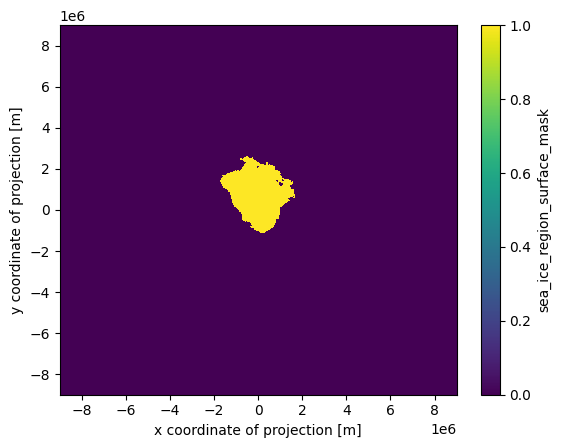

In [11]:
data['sea_ice_region_surface_mask'].isin(seas[0]).plot()

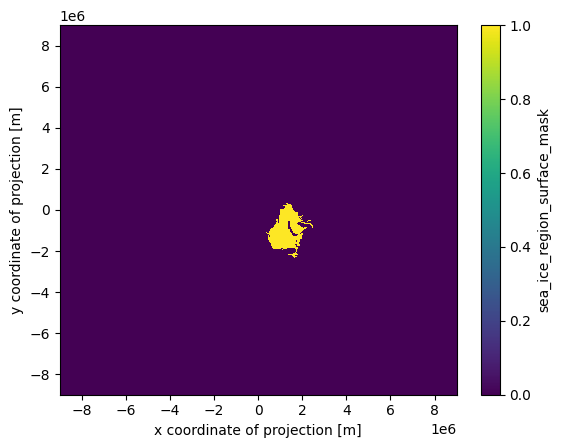

In [12]:
data['sea_ice_region_surface_mask'].isin(seas[1]).plot()

To do: plot the 9 subregions

In [16]:
sliced_data = data.isel(x=slice(720//2 - 432//2, 720//2 + 432//2), y=slice(720//2 - 432//2, 720//2 + 432//2))

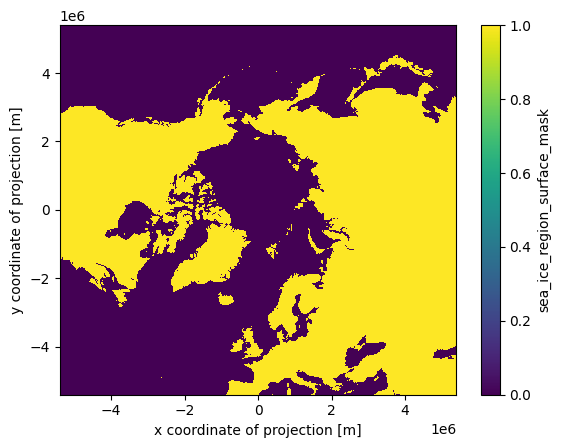

In [17]:
# land (I think; maybe there are more (maybe add 32 and 34?))
sliced_data['sea_ice_region_surface_mask'].isin((30, 32, 33)).plot()

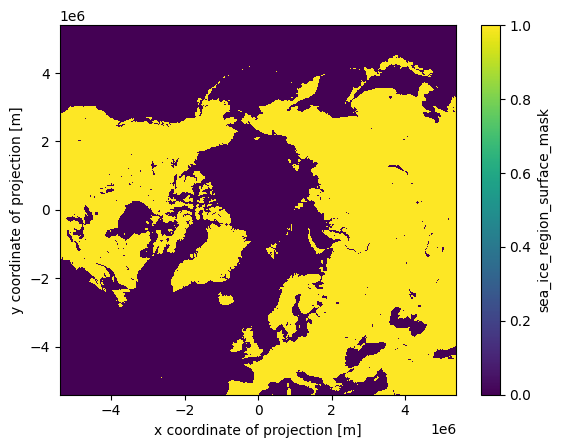

In [18]:
sliced_data['sea_ice_region_surface_mask'].isin((30, 33, 34)).plot();

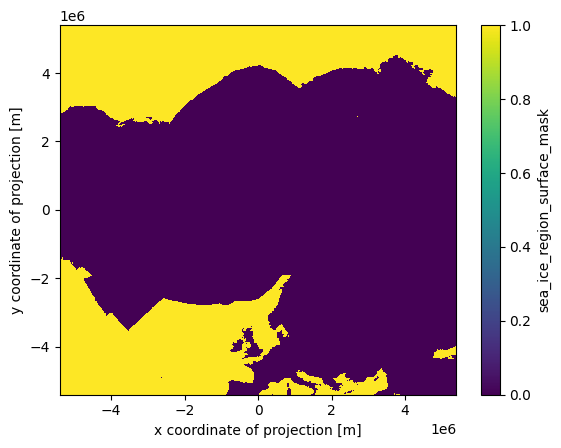

In [19]:
sliced_data['sea_ice_region_surface_mask'].isin((0,)).plot();

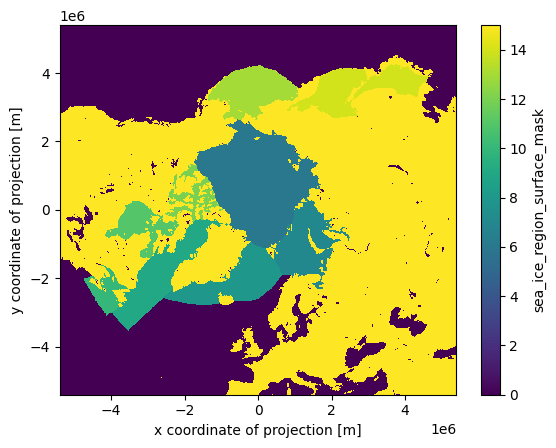

In [20]:
# to do: if possible, make the colors more distinct and put labels
# to do: change unit to km
sum((i+6)*sliced_data['sea_ice_region_surface_mask'].isin(sea) for i, sea in enumerate(seas + ((30, 33, 34),))).plot();

In [21]:
(sliced_data.x / 1000).to_numpy() # in km

array([-5387.5, -5362.5, -5337.5, -5312.5, -5287.5, -5262.5, -5237.5,
       -5212.5, -5187.5, -5162.5, -5137.5, -5112.5, -5087.5, -5062.5,
       -5037.5, -5012.5, -4987.5, -4962.5, -4937.5, -4912.5, -4887.5,
       -4862.5, -4837.5, -4812.5, -4787.5, -4762.5, -4737.5, -4712.5,
       -4687.5, -4662.5, -4637.5, -4612.5, -4587.5, -4562.5, -4537.5,
       -4512.5, -4487.5, -4462.5, -4437.5, -4412.5, -4387.5, -4362.5,
       -4337.5, -4312.5, -4287.5, -4262.5, -4237.5, -4212.5, -4187.5,
       -4162.5, -4137.5, -4112.5, -4087.5, -4062.5, -4037.5, -4012.5,
       -3987.5, -3962.5, -3937.5, -3912.5, -3887.5, -3862.5, -3837.5,
       -3812.5, -3787.5, -3762.5, -3737.5, -3712.5, -3687.5, -3662.5,
       -3637.5, -3612.5, -3587.5, -3562.5, -3537.5, -3512.5, -3487.5,
       -3462.5, -3437.5, -3412.5, -3387.5, -3362.5, -3337.5, -3312.5,
       -3287.5, -3262.5, -3237.5, -3212.5, -3187.5, -3162.5, -3137.5,
       -3112.5, -3087.5, -3062.5, -3037.5, -3012.5, -2987.5, -2962.5,
       -2937.5, -291

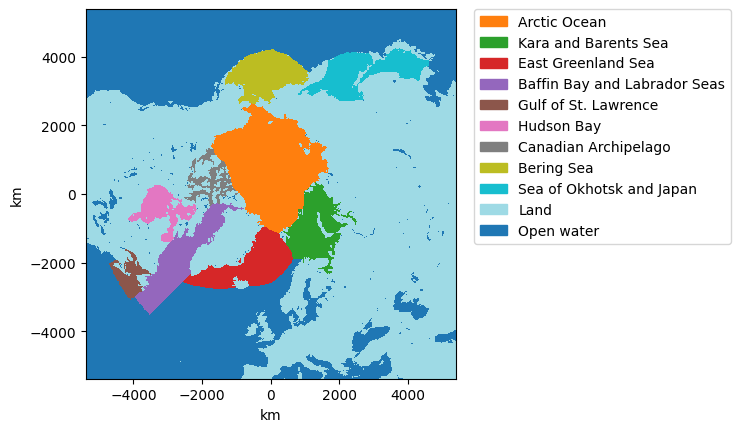

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# land should be gray
# also give units to the axes

fig, ax = plt.subplots()

# mostly copied from https://stackoverflow.com/a/40666180
map = sum((i+1)*sliced_data['sea_ice_region_surface_mask'].isin(sea) for i, sea in enumerate(seas + ((30, 33, 34),))).to_numpy()
# x and y in km
x_km = (sliced_data.x / 1000).to_numpy()
y_km = (sliced_data.y / 1000).to_numpy()
im = plt.imshow(map, interpolation='none', cmap='tab20', extent=(x_km.min(), x_km.max(), y_km.min(), y_km.max()))
# get the colors of the values, according to the
# colormap used by imshow
values = range(0, 10+1)
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=colors[i+1-len(values)], label=('Open water', 'Arctic Ocean', 'Kara and Barents Sea', 'East Greenland Sea', 'Baffin Bay and Labrador Seas', 'Gulf of St. Lawrence', 'Hudson Bay', 'Canadian Archipelago', 'Bering Sea', 'Sea of Okhotsk and Japan', 'Land')[i+1-len(values)] ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
ax.set_xlabel('km')
ax.set_ylabel('km')
plt.show()

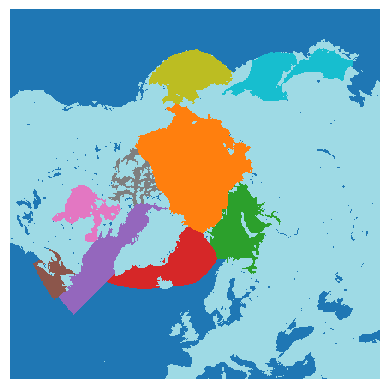

In [25]:
plt.imshow(map, interpolation='none', cmap='tab20')
plt.axis('off')
plt.savefig('subregions.png', bbox_inches='tight', pad_inches=0)

In [ ]:
(sliced_data.x / 1000).min().to_numpy()

array(-5387.5, dtype=float32)

In [ ]:
sliced_data

<xarray.Dataset>
Dimensions:                      (y: 432, x: 432)
Coordinates:
  * x                            (x) float32 -5.388e+06 -5.362e+06 ... 5.388e+06
  * y                            (y) float32 5.388e+06 5.362e+06 ... -5.388e+06
Data variables:
    sea_ice_region               (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    sea_ice_region_surface_mask  (y, x) float32 0.0 0.0 0.0 ... 30.0 30.0 30.0
    crs                          <U1 ''
Attributes: (12/27)
    title:                    Geographic regions for sea ice for the 25km EAS...
    summary:                  This file provides a description of regions use...
    acknowledgment:           These data are produced and supported by the NA...
    id:                       10.5067/CYW3O8ZUNIWC
    naming_authority:         org.doi.dx
    standard_name_authority:  CF Standard Name Table (v77, 19 January 2021)
    ...                       ...
    geospatial_lat_min:       0.0
    geospatial_lat_max:       90.0
    geospatial_lat_units:     degrees_north
    geospatial_lon_min:       -180.0
    geospatial_lon_max:       180.0
    geospatial_lon_units:     degrees_east

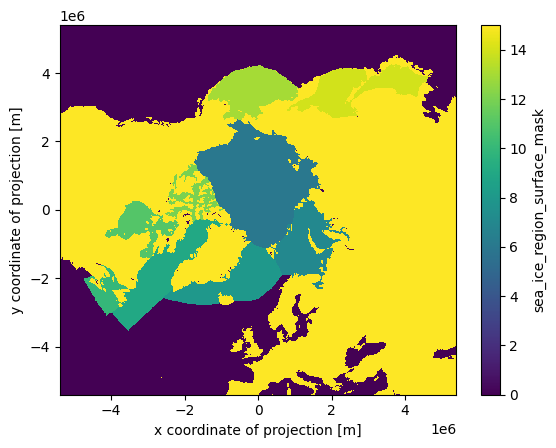

In [ ]:
sum((i+6)*sliced_data['sea_ice_region_surface_mask'].isin(sea) for i, sea in enumerate(seas + ((30, 32, 33, 34),))).plot();

In [ ]:
sum((i+6)*sliced_data['sea_ice_region_surface_mask'].isin(sea) for i, sea in enumerate(seas))

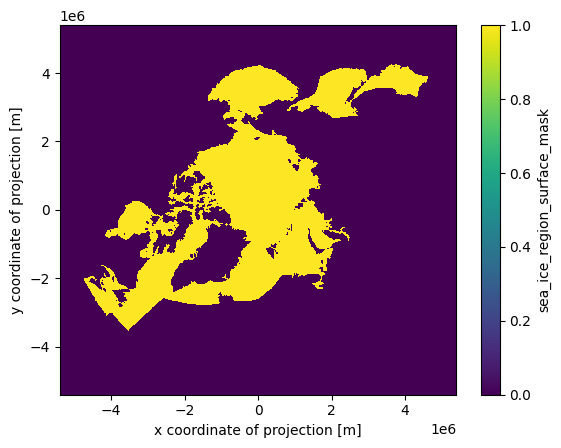

In [ ]:
sum(sliced_data['sea_ice_region_surface_mask'].isin(sea) for sea in seas).astype(bool).plot();

In [ ]:
sum(sliced_data['sea_ice_region_surface_mask'].isin(sea) for sea in seas).astype(bool).to_netcdf('seas_mask.nc')

In [ ]:
720//2

360

In [ ]:
data.x

<xarray.DataArray 'x' (x: 720)>
array([-8987500., -8962500., -8937500., ...,  8937500.,  8962500.,  8987500.],
      dtype=float32)
Coordinates:
  * x        (x) float32 -8.988e+06 -8.962e+06 ... 8.962e+06 8.988e+06
Attributes:
    standard_name:          projection_x_coordinate
    long_name:              x coordinate of projection
    units:                  m
    coverage_content_type:  coordinate
    valid_range:            [-9000000.  9000000.]